# visualize the graph

## Graphviz

In [16]:
import tensorflow as tf
from graphviz import Digraph
from IPython.display import clear_output, Image, display, HTML

In [12]:
def tf_to_dot(graph):
    """
    visualize graph with graphviz
    """
    dot = Digraph()
    # initialize node
    for n in g.as_graph_def().node:
        dot.node(n.name, label=n.name)
        
        # initialize edge
        for i in n.input:
            dot.edge(i, n.name) 
    return dot

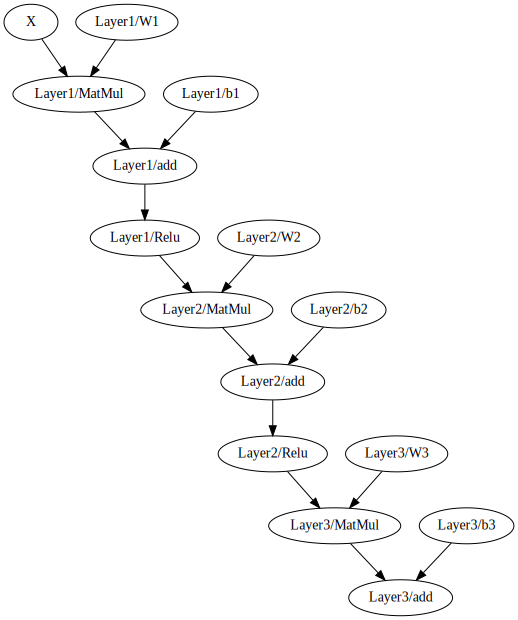

In [13]:
g = tf.Graph()

with g.as_default():
    X = tf.placeholder(tf.float32, name="X")
    
    with tf.name_scope("Layer1"):
        W1 = tf.placeholder(tf.float32, name="W1")
        b1 = tf.placeholder(tf.float32, name="b1")

        a1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
    with tf.name_scope("Layer2"):
        W2 = tf.placeholder(tf.float32, name="W2")
        b2 = tf.placeholder(tf.float32, name="b2")

        a2 = tf.nn.relu(tf.matmul(a1, W2) + b2)

    with tf.name_scope("Layer3"):
        W3 = tf.placeholder(tf.float32, name="W3")
        b3 = tf.placeholder(tf.float32, name="b3")

        y_hat = tf.matmul(a2, W3) + b3
    
tf.summary.FileWriter("logs", g).close()
tf_to_dot(g)

##  TensorBoard on local server

**TensorBoard** allows us to easily visualize the computational graph. 

All we need to do is save it using the `tf.summary.FileWriter`, 
which takes a directory and a graph, and serializes the graph in a format that **TensorBoard** can read. 
The directory can be anything you'd like, 
just make sure you point to the same directory using the 
`tensorboard --logdir=DIR`
command (DIR being the directory you specified to the FileWriter).

**TensorBoard** was taken out of the **TensorFlow** repo in tensorflow 1.40.
Open a console and run `python -m tensorboard.main --logdir=DIR` as replacement for `tensorboard --logdir=DIR`
This will launch an instance of **TensorBoard** which you can access at `http://localhost:6006`. 
Then navigate to the Graphs section and you should see a graph which was created in `tf.Graph()`.

The command `tensorboard --logdir=DIR` will launch **TensorBoard** from **Tensorflow** and causes `ModuleNotFoundError`.

In [ ]:
# We write the graph out to the `logs` directory
tf.summary.FileWriter("logs", g).close()   # python -m tensorboard.main --logdir=logs

## TensorBoard on Jupyter notebook

[Reference on StackOverflow](https://stackoverflow.com/questions/41388673/visualizing-a-tensorflow-graph-in-jupyter-doesnt-work/41463991#41463991): It basically takes the `tf.GraphDef`, sends it over to the cloud, and embeds an `<iframe>` with the resulting visualization right in the **Jupyter notebook**.

In [17]:
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
              function load() {{
                document.getElementById("{id}").pbtxt = {data};
              }}
        </script>
        
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        
        <div style="height:600px">
              <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [18]:
show_graph(g)